In [10]:
!pip install tensorflow
!pip install keras-tuner
!pip install sklearn

In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras import Sequential
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("/content/post_one_hot_encode.csv")

In [13]:
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

x_train=train.loc[:, ['Power', 'Fin Type_Round', 'Fin Type_Square', 'Fin Type_Triangular', 'Configuration_Inline', 'Configuration_Staggered', 'PCM_Paraffin', 'PCM_RT-35', 'PCM_RT-44', 'Temperature']]
x_train=x_train.to_numpy()
#x_train = x_train.astype('float32')
y_train=train.loc[:, 'Time']
y_train=y_train.to_numpy()
#y_train = y_train.astype('float32')
x_test=test.loc[:, ['Power', 'Fin Type_Round', 'Fin Type_Square', 'Fin Type_Triangular', 'Configuration_Inline', 'Configuration_Staggered', 'PCM_Paraffin', 'PCM_RT-35', 'PCM_RT-44', 'Temperature']]
x_test=x_test.to_numpy()
#x_test = x_test.astype('float32')
y_test=test.loc[:, 'Time']
y_test=y_test.to_numpy()
#y_test = y_test.astype('float32')

In [14]:
model = Sequential()
model = keras.Sequential()
model = keras.Sequential()
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(35, activation='relu'))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(45, activation='relu'))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(35, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(loss="mean_absolute_error", optimizer='Adam')

In [15]:
model.fit(x_train,y_train, epochs=487, batch_size=10)

Epoch 1/487
133/133 [==============================] - 1s 2ms/step - loss: 19.7753
Epoch 2/487
133/133 [==============================] - 0s 2ms/step - loss: 16.1489
Epoch 3/487
133/133 [==============================] - 0s 2ms/step - loss: 13.1129
Epoch 4/487
133/133 [==============================] - 0s 2ms/step - loss: 10.6499
Epoch 5/487
133/133 [==============================] - 0s 2ms/step - loss: 10.2066
Epoch 6/487
133/133 [==============================] - 0s 3ms/step - loss: 10.4052
Epoch 7/487
133/133 [==============================] - 0s 2ms/step - loss: 10.0470
Epoch 8/487
133/133 [==============================] - 0s 2ms/step - loss: 9.9374
Epoch 9/487
133/133 [==============================] - 0s 2ms/step - loss: 10.3047
Epoch 10/487
133/133 [==============================] - 0s 2ms/step - loss: 9.9624
Epoch 11/487
133/133 [==============================] - 0s 2ms/step - loss: 9.7021
Epoch 12/487
133/133 [==============================] - 0s 2ms/step - loss: 9.8195
Epoch

In [16]:
model_json = model.to_json()
with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/model.h5")

In [17]:
predicted=[]
count = 0
for x in x_test:
    x= np.reshape(x, ( 1 ,x.shape[0]))
    output = model.predict(x)
    predicted.append(output[0][0].tolist())

<function matplotlib.pyplot.show>

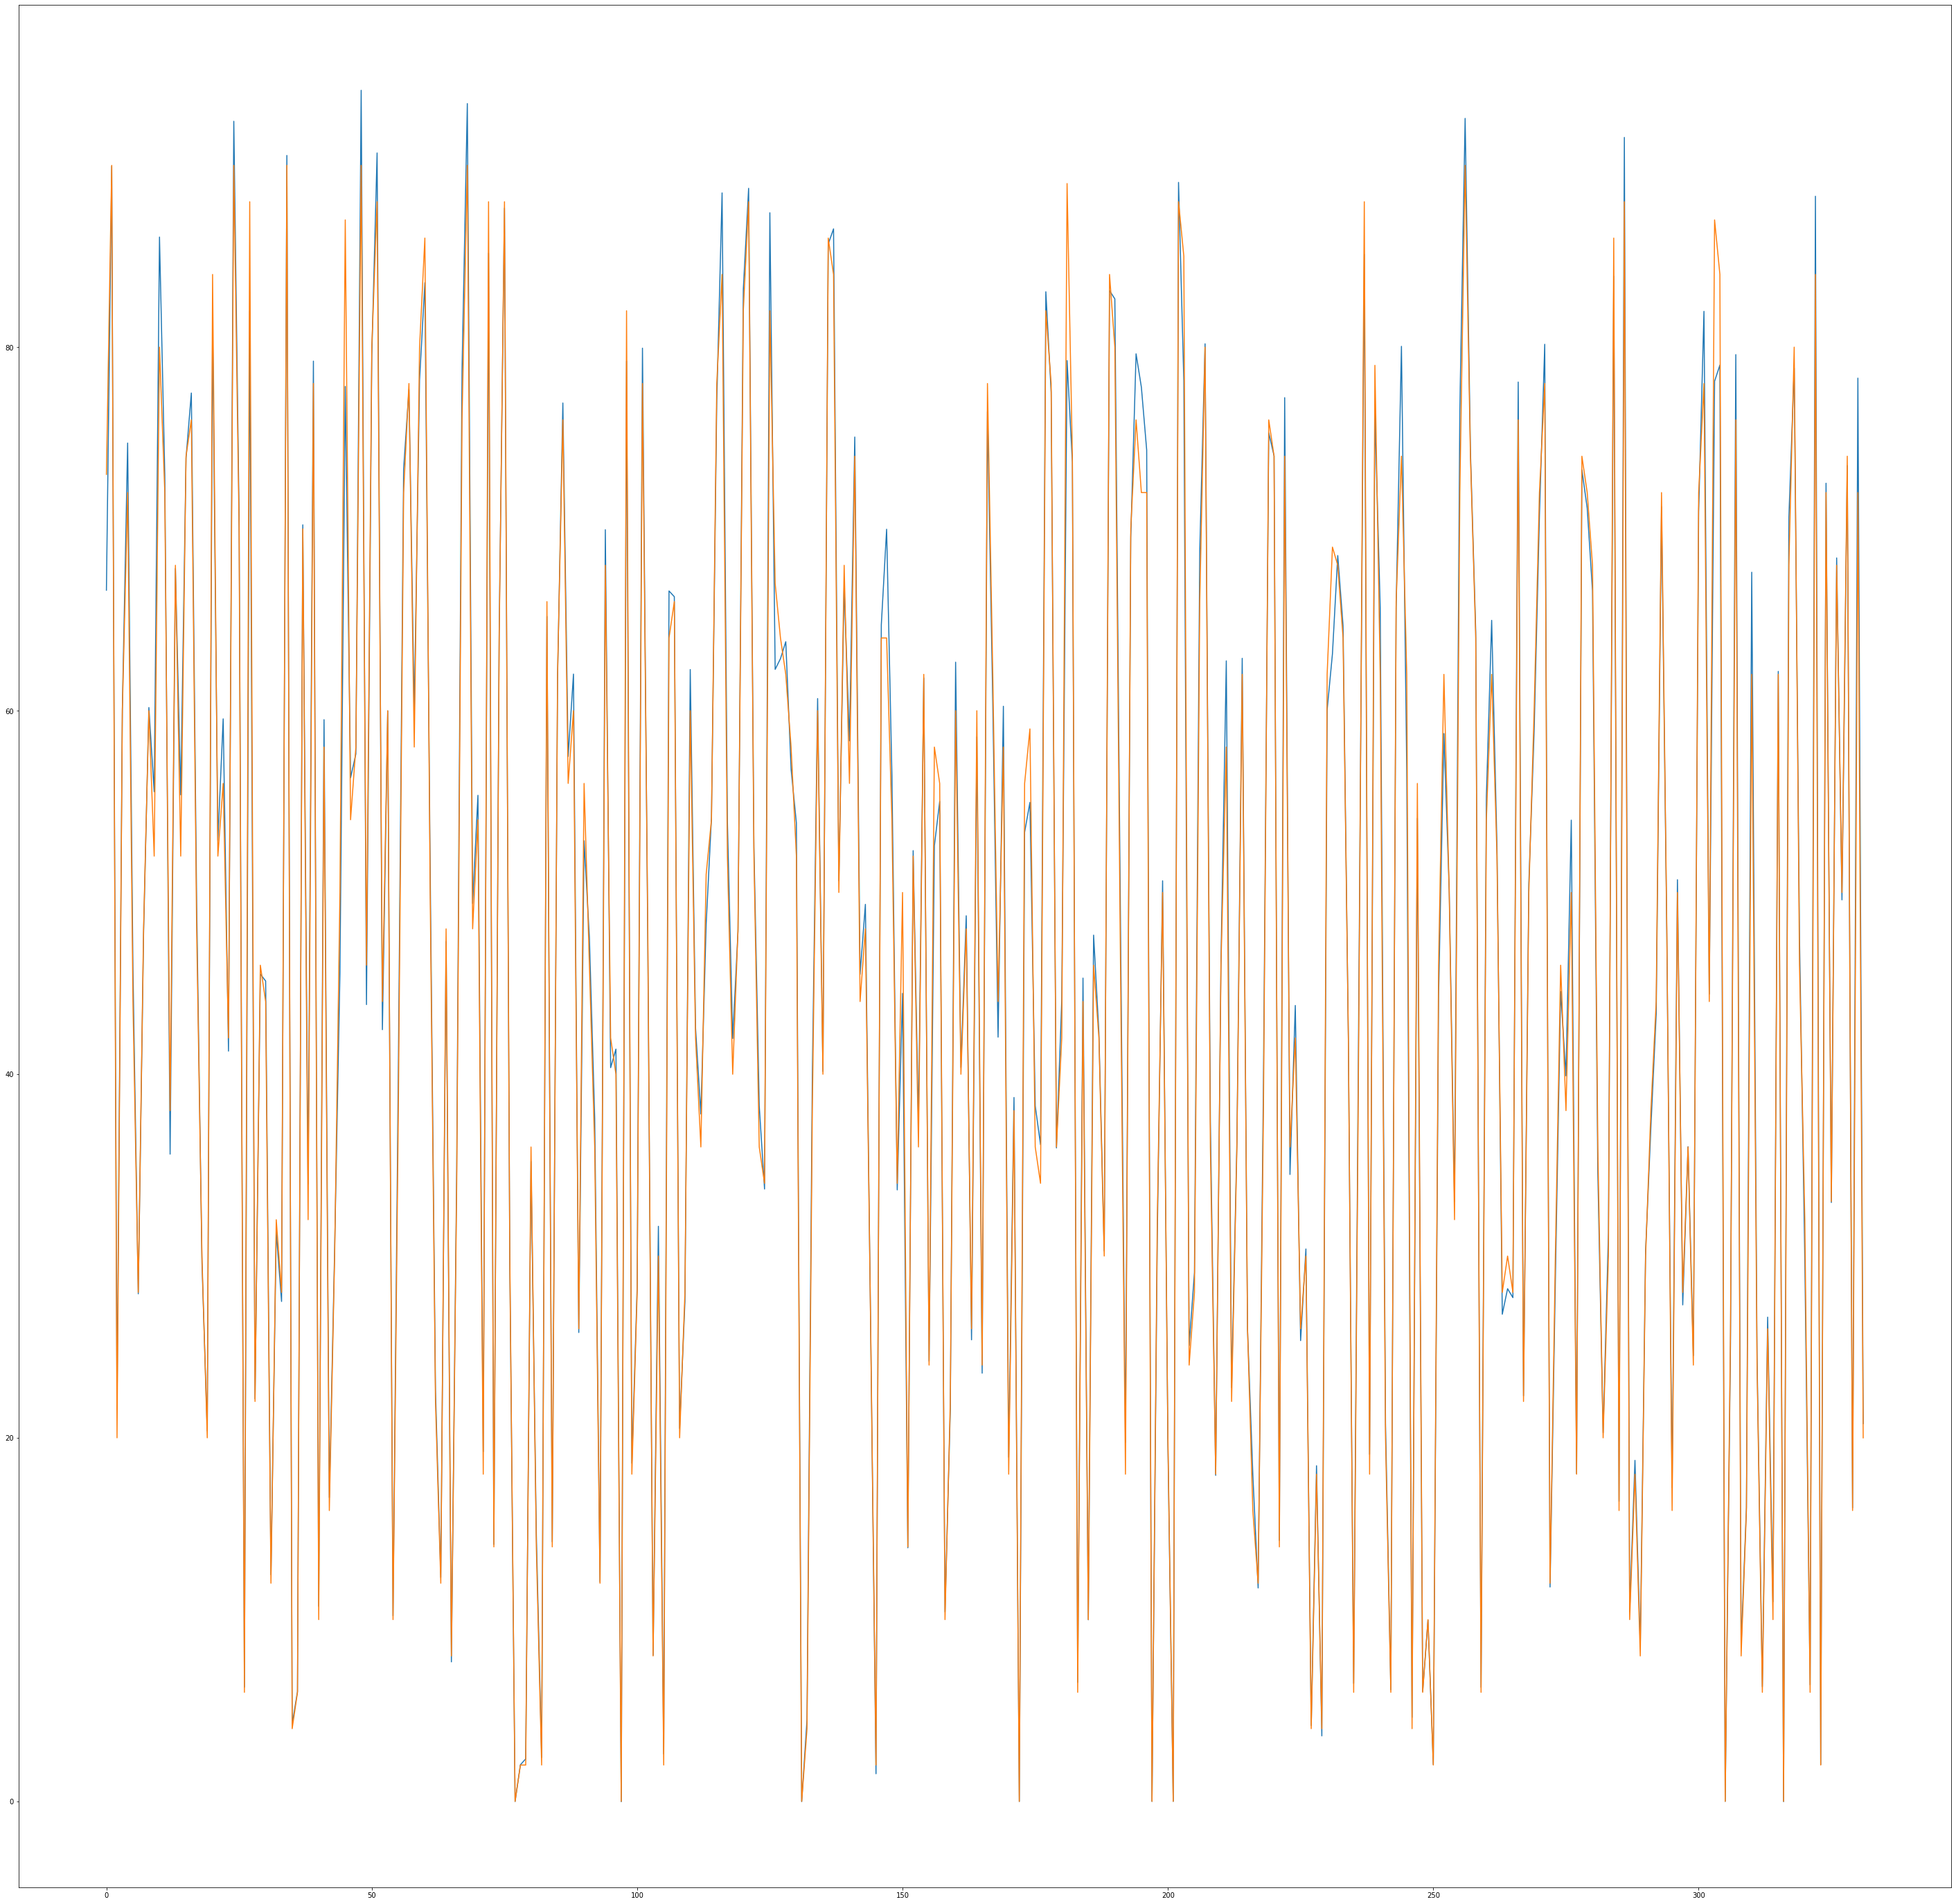

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.plot(predicted)
plt.plot(y_test)
plt.show